# ChatGPT 4 et les données en format csv

## Bibliothèques nécessaires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Données dans un DataFrame pandas

In [5]:
from io import StringIO

data = StringIO("""
id,client_id,location_id,service_id,jour,heure_début,heure_fin
1,67,22,5,Lundi,08:00,17:00
2,67,22,5,mardi,08:00,17:00
3,23,12,,Mercredi,08:00,17:00
4,19,34,9,Jeudi,08:00,17:00
5,67,22,,vendredi,08:00,17:00
6,0,0,2,Samedi,10:00,18:00
7,0,0,2,dimanche,11:00,17:00
8,,,22,lundi,08:00,12:00
9,,,22,Lundi,14:00,16:00
10,,,22,mercredi,10:00,15:00
13,67,22,,Lundi,9h00,03h00
""")
df = pd.read_csv(data)

In [6]:
df

,id,client_id,location_id,service_id,jour,heure_début,heure_fin
0,1,67.0,22.0,5.0,Lundi,08:00,17:00
1,2,67.0,22.0,5.0,mardi,08:00,17:00
2,3,23.0,12.0,NaN,Mercredi,08:00,17:00
3,4,19.0,34.0,9.0,Jeudi,08:00,17:00
4,5,67.0,22.0,NaN,vendredi,08:00,17:00
5,6,0.0,0.0,2.0,Samedi,10:00,18:00
6,7,0.0,0.0,2.0,dimanche,11:00,17:00
7,8,NaN,NaN,22.0,lundi,08:00,12:00
8,9,NaN,NaN,22.0,Lundi,14:00,16:00
9,10,NaN,NaN,22.0,mercredi,10:00,15:00


## Histogramme des jours de la semaine

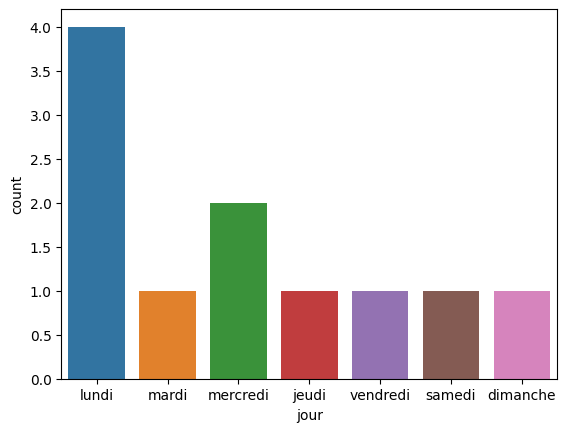

In [7]:
# Mettre les noms des jours de la semaine en minuscules pour l'uniformité
df['jour'] = df['jour'].str.lower()

# Créer un histogramme des jours de la semaine
sns.countplot(data=df, x='jour', order=['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'])

# Afficher le graphique
plt.show()

## Nombre de services par client

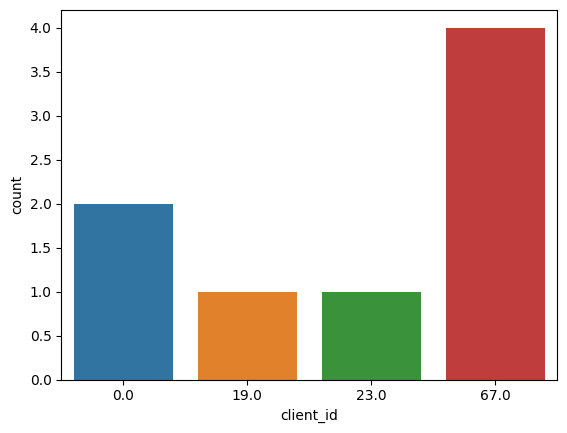

In [8]:
# Créer un histogramme des services par client
sns.countplot(data=df, x='client_id')

# Afficher le graphique
plt.show()

## Nombre de services par emplacement

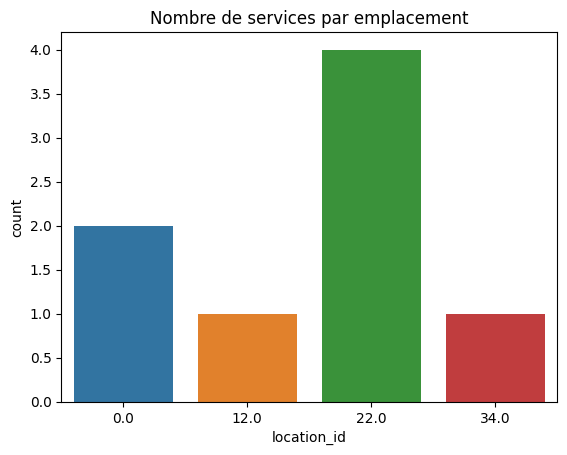

In [10]:
sns.countplot(data=df, x='location_id')
plt.title("Nombre de services par emplacement")
plt.show()

## Répartition des heures de début 

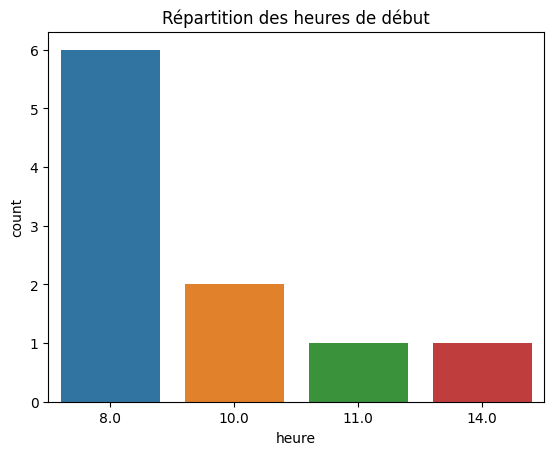

In [11]:
# Convertir les heures de début en format datetime
df['heure_début'] = pd.to_datetime(df['heure_début'], format='%H:%M', errors='coerce')

# Extraire les heures à partir des heures de début
df['heure'] = df['heure_début'].dt.hour

# Créer un histogramme des heures de début
sns.countplot(data=df, x='heure')
plt.title("Répartition des heures de début")
plt.show()

## Répartition des services par jour et heure de début

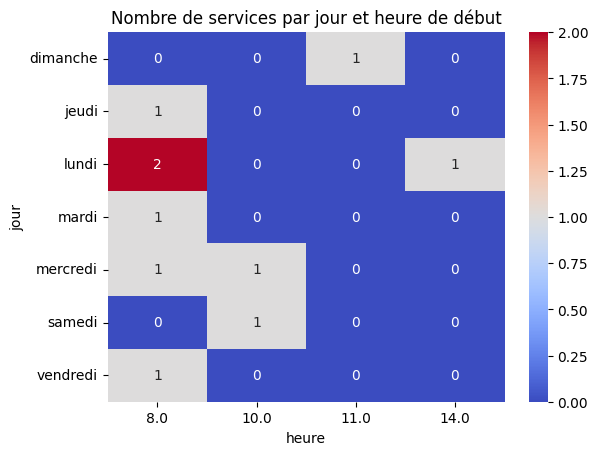

In [12]:
# Créer un tableau croisé dynamique des services par jour et heure de début
pivot_table = df.pivot_table(index='jour', columns='heure', values='id', aggfunc='count', fill_value=0)

# Créer une heatmap pour visualiser le tableau croisé dynamique
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Nombre de services par jour et heure de début")
plt.show()

## Durée des services

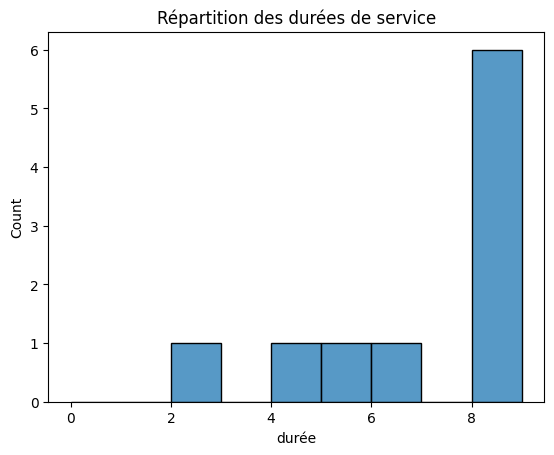

In [13]:
# Convertir les heures de fin en format datetime
df['heure_fin'] = pd.to_datetime(df['heure_fin'], format='%H:%M', errors='coerce')

# Calculer la durée des services
df['durée'] = (df['heure_fin'] - df['heure_début']).dt.seconds / 3600

# Créer un histogramme des durées de service
sns.histplot(data=df, x='durée', bins=range(0, int(df['durée'].max()) + 1))
plt.title("Répartition des durées de service")
plt.show()

## Nombre d'heures travaillées pour le client 67

In [15]:
# Filtrez le DataFrame pour le client 67
df_client67 = df[df['client_id'] == 67]

# Convertissez les heures de début et de fin en objets datetime
df_client67['heure_début'] = pd.to_datetime(df_client67['heure_début'], format='%H:%M', errors='coerce')
df_client67['heure_fin'] = pd.to_datetime(df_client67['heure_fin'], format='%H:%M', errors='coerce')

# Calculez la durée de chaque service
df_client67['durée'] = (df_client67['heure_fin'] - df_client67['heure_début']).dt.total_seconds() / 3600

# Calculez le total des heures
total_heures = df_client67['durée'].sum()

print(f"Le client 67 a un total de {total_heures} heures de service.")

Le client 67 a un total de 27.0 heures de service.


<ipython-input-15-7a34d5ca2534>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client67['heure_début'] = pd.to_datetime(df_client67['heure_début'], format='%H:%M', errors='coerce')
<ipython-input-15-7a34d5ca2534>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client67['heure_fin'] = pd.to_datetime(df_client67['heure_fin'], format='%H:%M', errors='coerce')
<ipython-input-15-7a34d5ca2534>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro